## EDA for Current_avaiable_Property_rent_1 Dataset


I performed in-depth EDA on a dataset with the details of Rent Data in it.


The features in the dataset are:
1. Price/month
2. Type
3. Acreage
4. Bedrooms
5. Rental Type


<b>Goal: </b> Analyze patterns and relationships between all the features and find suitable features to be used for further purposes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Current_available_property_rent_1.csv")
data.head()

,Price/month,Type,Acreage,Bedrooms,Rental type
0,€1.125,Apartment,27 m²,1 bedroom,Co-living
1,€1100 - €1500,Apartment,80 m²,2 Bedrooms,Private landlord
2,€800,Apartment,15 m²,1 bedroom,Rental company
3,€2.200,Apartment,65 m²,1 bedroom,Private landlord
4,€1.150,Apartment,45 m²,1 bedroom,Rental company


In [5]:
data.shape

(416, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price/month  416 non-null    object
 1   Type         416 non-null    object
 2   Acreage      416 non-null    object
 3   Bedrooms     416 non-null    object
 4   Rental type  416 non-null    object
dtypes: object(5)
memory usage: 16.4+ KB


### Step 1: Data Preprocessing

In [7]:
#Check for null values
data.isnull().sum()

Price/month    0
Type           0
Acreage        0
Bedrooms       0
Rental type    0
dtype: int64

Since there are no null values we can go for preprocessing of the data and fix it to find patterns

Firstly we can find the mean rent for the rents that don't have a fixed value, but rather have a range of the approximation

In [8]:
def preprocess_price(price):
    if '-' in price:
        prices = price.split('-')
        cleaned_prices = [int(p.replace('€', '').replace('.', '').replace(',', '')) for p in prices]
        average_price = int(sum(cleaned_prices) // len(cleaned_prices))
        return average_price
    else:
        cleaned_price = int(price.replace('€', '').replace('.', '').replace(',', ''))
        return cleaned_price

# Preprocess all prices in the column
data['Price/month_new'] = [preprocess_price(price) for price in data['Price/month']]

# Output the updated column
print(data['Price/month_new'])

0       1125
1       1300
2        800
3       2200
4       1150
       ...  
411    14837
412    18459
413    15545
414    15734
415    17855
Name: Price/month_new, Length: 416, dtype: int64


In [9]:
data.head()

,Price/month,Type,Acreage,Bedrooms,Rental type,Price/month_new
0,€1.125,Apartment,27 m²,1 bedroom,Co-living,1125
1,€1100 - €1500,Apartment,80 m²,2 Bedrooms,Private landlord,1300
2,€800,Apartment,15 m²,1 bedroom,Rental company,800
3,€2.200,Apartment,65 m²,1 bedroom,Private landlord,2200
4,€1.150,Apartment,45 m²,1 bedroom,Rental company,1150


In [10]:
data['Acreage'] = data['Acreage'].str.replace(' m²', '').astype(int)
print(data['Acreage'].head())

0    27
1    80
2    15
3    65
4    45
Name: Acreage, dtype: int64


In [11]:
data.head()

,Price/month,Type,Acreage,Bedrooms,Rental type,Price/month_new
0,€1.125,Apartment,27,1 bedroom,Co-living,1125
1,€1100 - €1500,Apartment,80,2 Bedrooms,Private landlord,1300
2,€800,Apartment,15,1 bedroom,Rental company,800
3,€2.200,Apartment,65,1 bedroom,Private landlord,2200
4,€1.150,Apartment,45,1 bedroom,Rental company,1150


In [12]:
data['Type'].unique()

array(['Apartment ', 'House '], dtype=object)

In [13]:
print(data['Bedrooms'])

0        1 bedroom
1      2 Bedrooms 
2        1 bedroom
3        1 bedroom
4        1 bedroom
          ...     
411    3 Bedrooms 
412    3 Bedrooms 
413    4 Bedrooms 
414    4 Bedrooms 
415    3 Bedrooms 
Name: Bedrooms, Length: 416, dtype: object


In [14]:
data['Bedrooms'] = data['Bedrooms'].str.extract('(\d+)').astype(int)

In [15]:
data.head()

,Price/month,Type,Acreage,Bedrooms,Rental type,Price/month_new
0,€1.125,Apartment,27,1,Co-living,1125
1,€1100 - €1500,Apartment,80,2,Private landlord,1300
2,€800,Apartment,15,1,Rental company,800
3,€2.200,Apartment,65,1,Private landlord,2200
4,€1.150,Apartment,45,1,Rental company,1150


In [16]:
data.drop('Price/month',axis=1,inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Type             416 non-null    object
 1   Acreage          416 non-null    int64 
 2   Bedrooms         416 non-null    int64 
 3   Rental type      416 non-null    object
 4   Price/month_new  416 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.4+ KB


Let's classify numerical and categorical variables to analyze

In [18]:
numerical_features = data.columns[data.dtypes != 'object']
categorical_features = data.columns[data.dtypes == 'object']

In [19]:
numerical_features

Index(['Acreage', 'Bedrooms', 'Price/month_new'], dtype='object')

In [20]:
categorical_features

Index(['Type', 'Rental type'], dtype='object')

Description of Categorical Variables

In [21]:
data[categorical_features].describe()

,Type,Rental type
count,416,416
unique,2,3
top,Apartment,Rental company
freq,413,390


### Pie Charts for Categorical Data

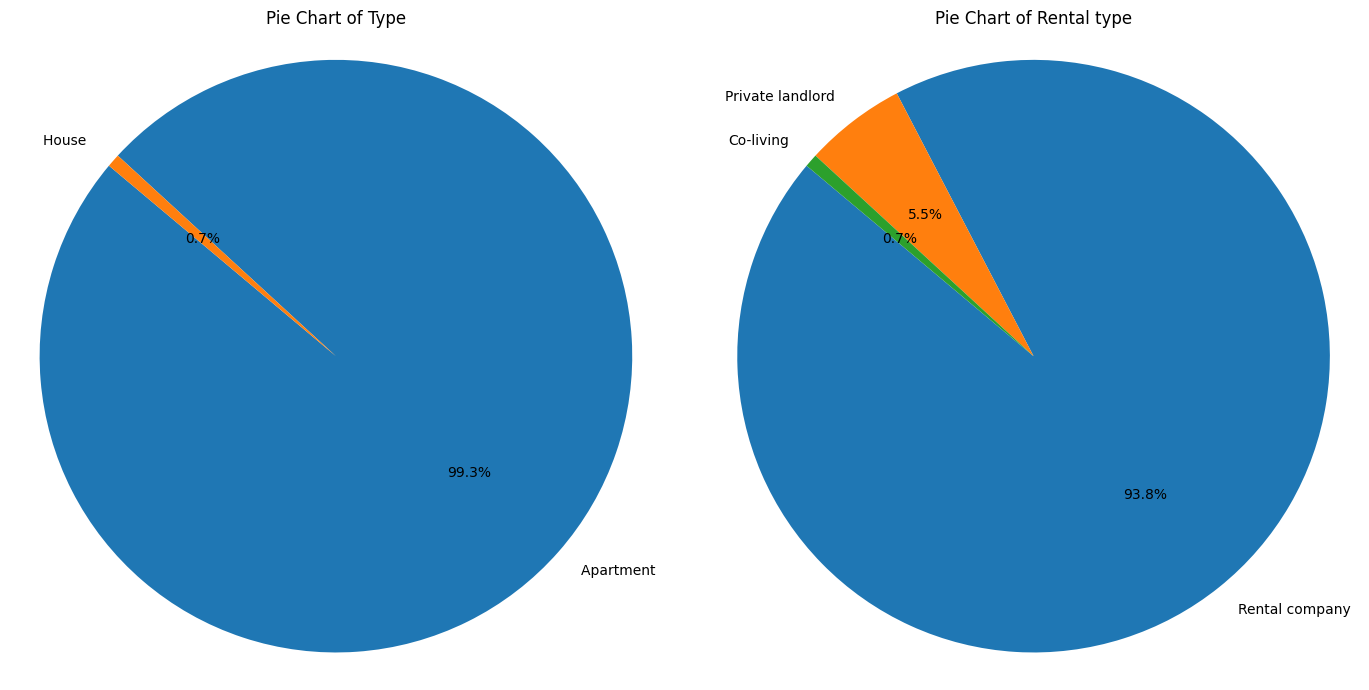

In [30]:
plt.figure(figsize=(14,7))

for i,feature in enumerate(categorical_features):
  plt.subplot(1,len(categorical_features),i+1)
  category_counts = data[feature].value_counts()
  plt.pie(category_counts,labels = category_counts.index,autopct='%1.1f%%',startangle=140)
  plt.title(f'Pie Chart of {feature}')
  plt.axis('equal')

plt.tight_layout()
plt.show()

### Observations from the pie charts

* Most of the plots for rent are Apartments.
* Most of the plots are managed by several rental companies.

### Box Plots for Numerical Columns

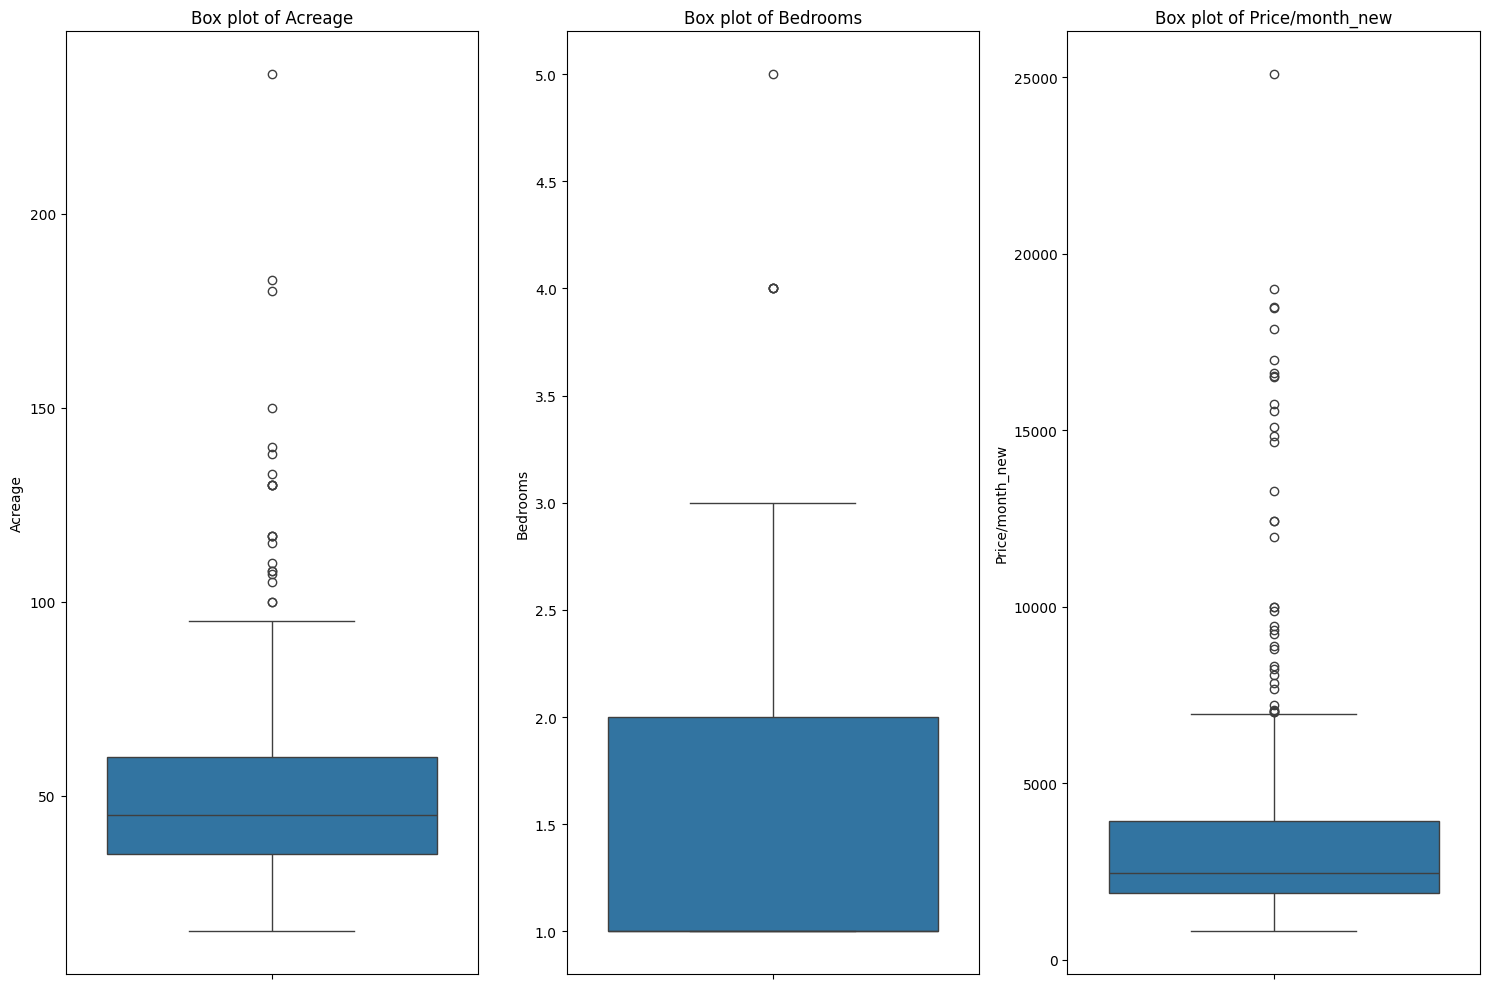

In [29]:
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(1,len(numerical_features),i+1)
  sns.boxplot(y=data[feature])
  plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

### Observations from Box Plots

1. <b>Acreage :</b>
  * The majority of plot area is around 50 sqmt.
  * There are several outliers in the data, one being a plot a size above 200sqmt. They may cost high in rent or most likely a scam.

2. <b>Bedrooms : </b>
  *  Most of the plots have around 2-3 bedrooms
  * There are not much of outliers in the bedroom data

3. <b>Price/month or Rent : </b>
  * Mostly the plots in the data below €5000, which is expected. But there are several outliers suggesting high rents for some plots, potentially leading to a scam.

### Histogram for Numerical Columns


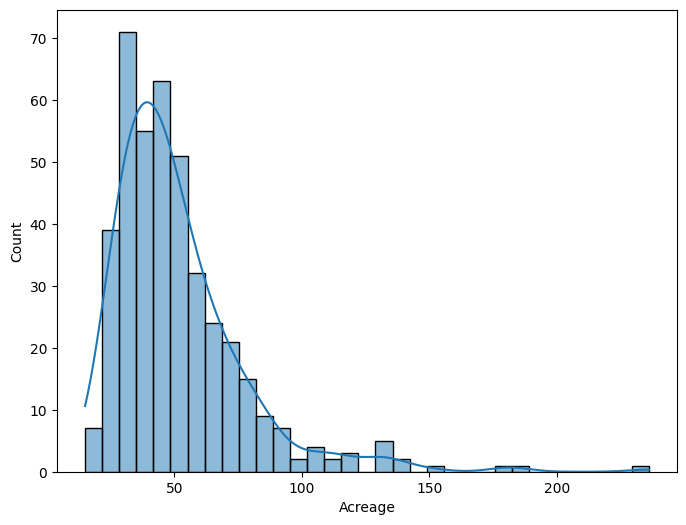

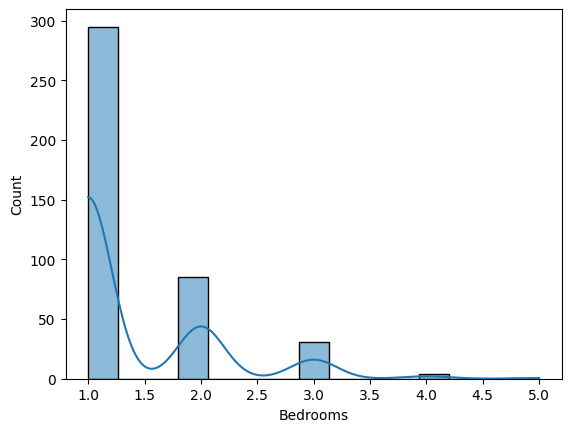

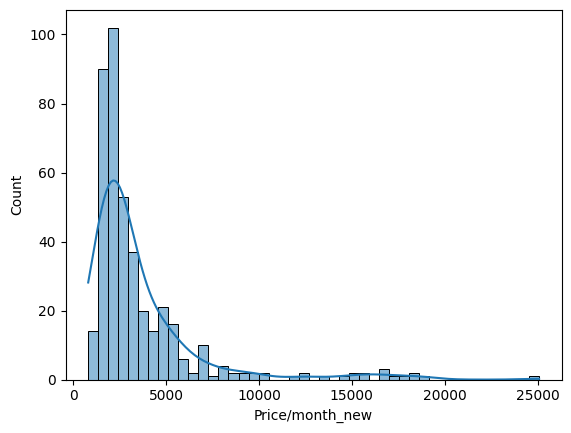

In [32]:
plt.figure(figsize=(8,6))
x = 0
for i in numerical_features:
    sns.histplot(data= data, x=i , kde =True)
    print('\n')
    plt.show()

### Observations from Histograms of Numerical Data

1. <b>Acreage : </b>
    
    * Most of the plots are of size of around 30-35 sqmt.
    * There is a peak at 35sqmt.

2. <b>Bedrooms : </b>
    
    * There are mostly 1-2 bedrooms in a flat for rent,which is quite common.

3. <b>Price/month : </b>

    * The average rent is about €3500-€4000 per month since there is a peak there.
    * We can also see few properties with a rent of €25000 per month.


So most of the rental properties are around 30-35 sqmt., have 1-2 rooms and rented per month at €4000

Let's transform the categorical variables into numerical using One Hot Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), ['Type', 'Rental type'])
    ],
    remainder='passthrough'
)

In [34]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

In [35]:
df_transformed = pipeline.fit_transform(data)

In [36]:
df_transformed = pd.DataFrame(df_transformed, columns=['Type', 'Rental type', 'Acreage', 'Bedrooms', 'Price/month_new'])

In [37]:
df_transformed.head()

,Type,Rental type,Acreage,Bedrooms,Price/month_new
0,0.0,0.0,27.0,1.0,1125.0
1,0.0,1.0,80.0,2.0,1300.0
2,0.0,2.0,15.0,1.0,800.0
3,0.0,1.0,65.0,1.0,2200.0
4,0.0,2.0,45.0,1.0,1150.0


In [38]:
df_transformed.describe()

,Type,Rental type,Acreage,Bedrooms,Price/month_new
count,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.007212,1.930288,51.310096,1.391827,3578.766827
std,0.084716,0.281897,26.087018,0.689215,3240.970018
min,0.000000,0.000000,15.000000,1.000000,800.000000
25%,0.000000,2.000000,35.000000,1.000000,1889.500000
50%,0.000000,2.000000,45.000000,1.000000,2438.000000
75%,0.000000,2.000000,60.000000,2.000000,3933.500000
max,1.000000,2.000000,236.000000,5.000000,25085.000000


1. <b>Type :</b>
  * Most of the properties in the dataset are Houses

2. <b>Rental type :</b>
  * Most of the properties are owned by rental companies

3. <b>Acreage :</b>
  * The average property size is 51 sqmts.
  * Plot sizes range from 15 sqmt. to 236 sqmt.
  * Standard Deviation = 26.087 sqmt.
  * The data looks mostly symmetrical

4. <b>Bedrooms :</b>
  * The average number of bedrooms in a plot is 1
  * The maximum number of rooms that rental plots offer is 5
  * Standard Deviation = 0.6892
  * The data is symmetric since mean and median appear to be same

5. <b>Price/month new:</b>
  * The average rent per month is around €3578.
  * The highest rent is €25085.
  * Standard Deviation = €3240.97
  * The data here is a bit skewed to the right since the values are increasing as the distribution progresses

### Correlation Matrix


Text(0.5, 1.0, 'Correlation Heatmap')

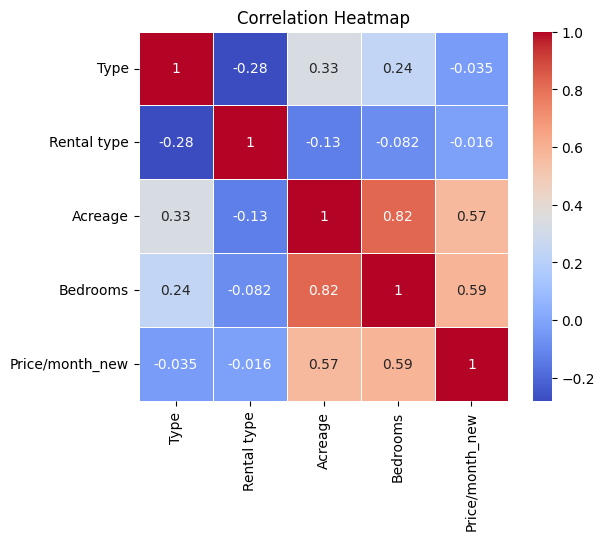

In [40]:
sns.heatmap(df_transformed.corr(), annot=True,cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap')

#### Observations from the Correlation Heatmap
* <b>Strong Correlation : </b> Bedrooms and Acreage have a Strong Correlation
* <b>Moderate Correlations : </b> Acreage and Rent and Acrage and Type of plot have moderate Correlation
* <b>Weak Correlation : </b> Bedrooms and Type, Rental Type and Acreage,Rental Type and Rent and Rental Types and Number of Bedrooms have weak correlation  